# 0. Install and import the libraries

In [1]:
'''!pip install numpy
!pip install tensorflow
!pip install keras
!pip install matplotlib'''

'!pip install numpy\n!pip install tensorflow\n!pip install keras\n!pip install matplotlib'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# 1. Set Random Seed for Reproducibility

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
batch_size = 64

# 2. Load and Preprocess the MNIST Dataset

In [4]:
# Load the MNIST dataset
(x_train, y_train_orig), (x_test, y_test_orig) = keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range and flatten them
x_train = x_train.astype('float32') / 255.0
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test = x_test.astype('float32') / 255.0
x_test_flat = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train_orig, num_classes)
y_test = keras.utils.to_categorical(y_test_orig, num_classes)

# 3. Hyperparameters

In [5]:
''' TODO: Adjust the following parameters with different values. Save the plots and test results for each setup.
    TODO: write a report about your findings from varying the parameters and their effect on overall performance. '''



# layer: [128], [256, 256], ... .

#prof
#learning rate: 0.1, 0.01

#epoch: 5, 10, 50
#number of layers [128], [128, 128]
#hidden units: [256], [256, 256]

learning_rate = 0.01
num_epochs = 50
hidden_layers = [256, 256]




# 4. Define the Neural Network Model

In [6]:
def create_mlp_model(input_size, hidden_layers, output_size):
    model = keras.Sequential()

    # Input layer is defined by specifying input_shape in the first layer
    for i, units in enumerate(hidden_layers):
        if i == 0:
            # First hidden layer with input shape specified
            model.add(layers.Dense(units, activation='relu', input_shape=(input_size,)))
        else:
            # Subsequent hidden layers
            model.add(layers.Dense(units, activation='relu'))

    # Output layer with softmax activation for multi-class classification
    model.add(layers.Dense(output_size, activation='softmax'))

    return model

# Model parameters
input_size = 28 * 28  # MNIST images are 28x28 pixels
output_size = num_classes  # 10 classes for digits 0-9

# Create the model
model = create_mlp_model(input_size, hidden_layers, output_size)

C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Compile the Model

In [7]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train the Model

In [8]:
history = model.fit(
    x_train_flat, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.1,  # Use 10% of training data for validation
    verbose=1
)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6472 - loss: 1.3567 - val_accuracy: 0.9083 - val_loss: 0.3544
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8864 - loss: 0.4000 - val_accuracy: 0.9252 - val_loss: 0.2725
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9065 - loss: 0.3257 - val_accuracy: 0.9315 - val_loss: 0.2394
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9166 - loss: 0.2880 - val_accuracy: 0.9388 - val_loss: 0.2177
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9239 - loss: 0.2614 - val_accuracy: 0.9443 - val_loss: 0.2006
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9309 - loss: 0.2401 - val_accuracy: 0.9492 - val_loss: 0.1864
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9360 - loss: 0.2221 - val_accuracy: 0.9523 - val_loss: 0.1743
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9405 - loss: 0.2065 - val_accuracy: 0.

# 7. Evaluate the Model on Test Data

In [9]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 97.71%


# 8. Visualize Training History

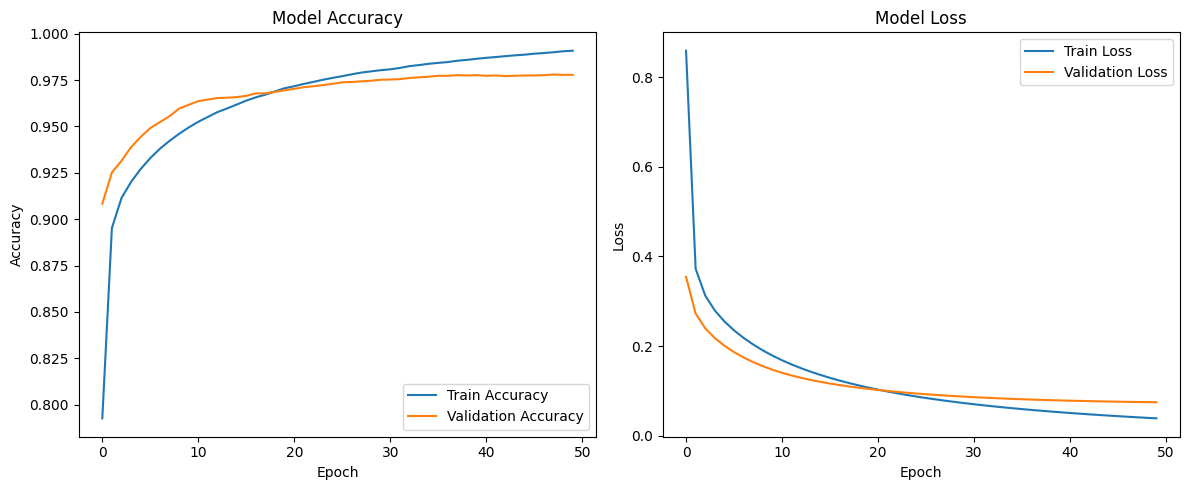

In [10]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 9. Test the Model on Random Input Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


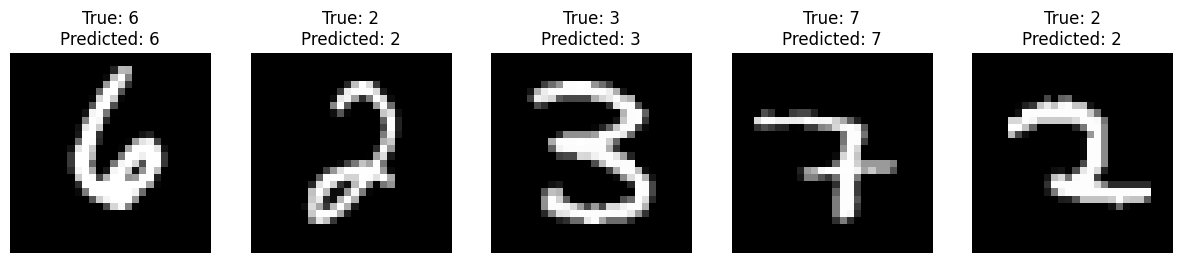

In [11]:
# Select random samples from the test set
num_samples = 5
random_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
random_images = x_test[random_indices]
random_images_flat = x_test_flat[random_indices]
random_labels = y_test_orig[random_indices]

# Predict the labels of the random images
predictions = model.predict(random_images_flat)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the random images along with predicted and true labels
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {random_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()